In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models
import cv2

In [194]:
df = pd.read_csv('train.csv')


In [195]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,...,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,...,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,...,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,...,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,...,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [196]:
null_values = df.isnull().sum()
print(null_values)

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
 n_unique_tokens                 0
n_non_stop_words                 0
 n_non_stop_unique_tokens        0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [197]:
column_types = df.dtypes

print(column_types)

timedelta                          int64
n_tokens_title                     int64
n_tokens_content                   int64
 n_unique_tokens                 float64
n_non_stop_words                 float64
 n_non_stop_unique_tokens        float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
kw_min_min                         int64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                         int64
kw_max_max                         int64
kw_avg_max                       float64
kw_min_avg      

In [198]:
df.shape

(31715, 60)

In [199]:
correlation_matrix = df.corr()

print(correlation_matrix)

                               timedelta  n_tokens_title  n_tokens_content  \
timedelta                       1.000000       -0.244381         -0.064668   
n_tokens_title                 -0.244381        1.000000          0.017577   
n_tokens_content               -0.064668        0.017577          1.000000   
 n_unique_tokens                0.001447       -0.005475         -0.001948   
n_non_stop_words               -0.000971       -0.005023          0.018043   
 n_non_stop_unique_tokens       0.002307       -0.005587          0.002580   
num_hrefs                      -0.005026       -0.050120          0.417864   
num_self_hrefs                  0.063309       -0.013210          0.299669   
num_imgs                       -0.027954       -0.008319          0.344067   
num_videos                     -0.000635        0.052411          0.109667   
average_token_length            0.132421       -0.071298          0.168946   
num_keywords                    0.047607       -0.003314        

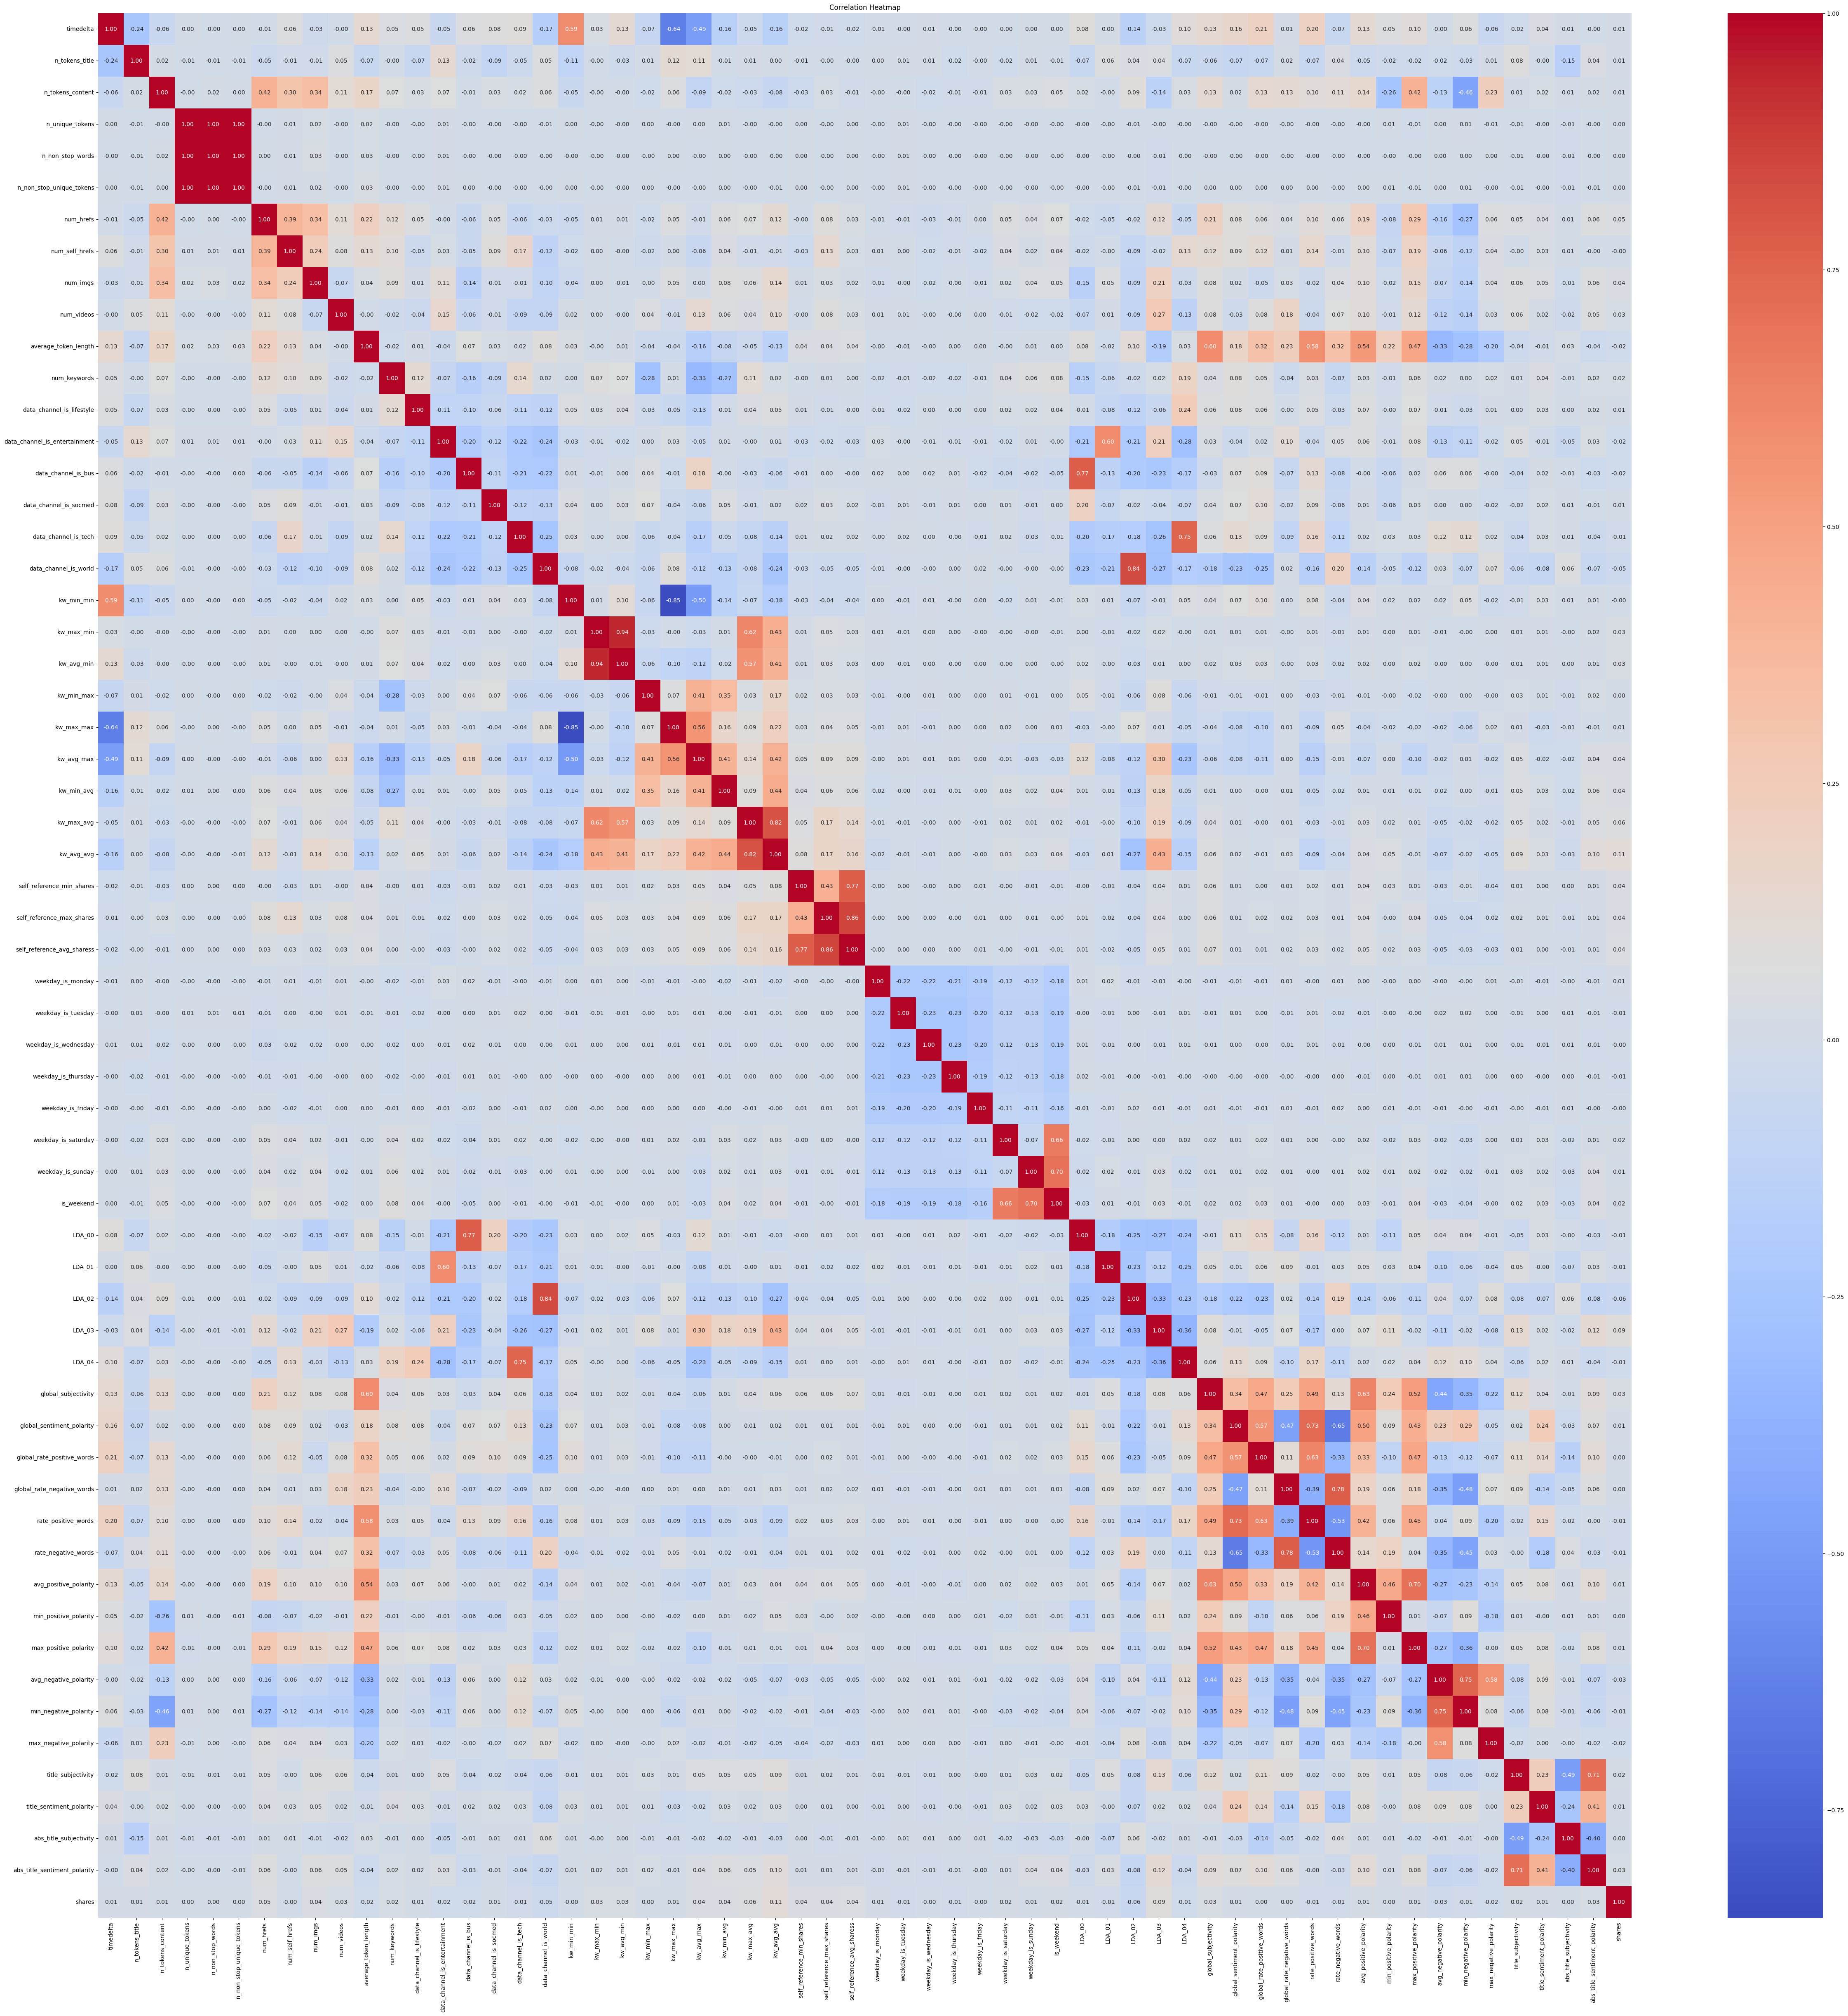

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing your data
# Replace df with your actual DataFrame name
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [201]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,...,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,...,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,...,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,...,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,...,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [202]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,338,15,628,0.509709,1.0,0.645084,14,1,1,0,...,0.033333,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.041667,0.333333,16100
1,715,11,409,0.519608,1.0,0.657480,2,0,1,0,...,0.136364,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.500000,0.000000,508
2,262,7,345,0.609329,1.0,0.783920,5,2,1,0,...,0.062500,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
3,279,11,217,0.580189,1.0,0.775000,8,2,3,0,...,0.033333,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.050000,0.200000,3100
4,647,13,123,0.739837,1.0,0.887324,3,0,1,0,...,0.200000,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.500000,0.000000,6900


In [203]:
import pandas as pd
correlation_matrix = df.corr()
target_column = 'shares'
low_corr_columns = correlation_matrix[correlation_matrix[target_column].abs() <= 0.01].index
df = df.drop(low_corr_columns, axis=1)
print("Dropped columns with correlation with '{}' less than 0.01:".format(target_column))
print(low_corr_columns)


Dropped columns with correlation with 'shares' less than 0.01:
Index(['timedelta', 'n_tokens_content', ' n_unique_tokens', 'n_non_stop_words',
       ' n_non_stop_unique_tokens', 'num_self_hrefs',
       'data_channel_is_lifestyle', 'data_channel_is_socmed', 'kw_min_min',
       'kw_min_max', 'kw_max_max', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_friday', 'weekday_is_sunday',
       'LDA_00', 'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'min_positive_polarity',
       'abs_title_subjectivity'],
      dtype='object')


In [204]:
df.shape

(31715, 37)

In [205]:
df

,n_tokens_title,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_world,...,global_sentiment_polarity,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_sentiment_polarity,shares
0,15,14,1,0,5.090764,7,0,1,0,0,...,0.047722,0.275971,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.333333,16100
1,11,2,1,0,4.958435,4,0,0,0,1,...,0.103533,0.295343,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.000000,508
2,7,5,1,0,4.942029,5,0,0,0,0,...,0.190472,0.428715,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.000000,1300
3,11,8,3,0,4.520737,7,0,0,0,0,...,0.251587,0.325667,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.200000,3100
4,13,3,1,0,4.479675,4,0,0,1,0,...,0.115013,0.444524,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.000000,6900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,8,3,0,1,4.878049,6,0,0,0,0,...,0.288636,0.352778,0.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3700
31711,11,14,10,0,4.756881,7,0,0,0,0,...,0.257500,0.510606,1.0,-0.147917,-0.187500,-0.050000,0.694444,0.375000,0.375000,492
31712,11,5,2,0,4.691860,8,1,0,0,0,...,-0.021612,0.357143,0.5,-0.104233,-0.400000,-0.050000,0.150000,-0.050000,0.050000,1100
31713,7,4,0,2,4.322222,8,0,0,0,0,...,0.216667,0.386667,0.5,-0.200000,-0.200000,-0.200000,0.500000,0.250000,0.250000,1500


In [206]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = df.columns[(df.min() < -1) | (df.max() > 1)]
scaler = MinMaxScaler(feature_range=(-1, 1))
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print("Columns scaled:")
print(columns_to_scale)

Columns scaled:
Index(['n_tokens_title', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_max_min', 'kw_avg_min',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'shares'],
      dtype='object')


In [207]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Step 2: Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Step 3: Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())


   n_tokens_title  num_hrefs  num_imgs  num_videos  average_token_length  \
0        0.238095  -0.907895 -0.984375        -1.0              0.266118   
1       -0.142857  -0.986842 -0.984375        -1.0              0.233206   
2       -0.523810  -0.967105 -0.984375        -1.0              0.229126   
3       -0.142857  -0.947368 -0.953125        -1.0              0.124347   
4        0.047619  -0.980263 -0.984375        -1.0              0.114134   

   num_keywords  data_channel_is_entertainment  data_channel_is_bus  \
0      0.333333                           -1.0                  1.0   
1     -0.333333                           -1.0                 -1.0   
2     -0.111111                           -1.0                 -1.0   
3      0.333333                           -1.0                 -1.0   
4     -0.333333                           -1.0                 -1.0   

   data_channel_is_tech  data_channel_is_world  ...  \
0                  -1.0                   -1.0  ...   
1     

In [208]:
X = df_scaled.drop('shares', axis='columns')
y = df_scaled['shares']


In [209]:
df

,n_tokens_title,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_world,...,global_sentiment_polarity,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_sentiment_polarity,shares
0,0.238095,-0.907895,-0.984375,-1.000000,0.266118,0.333333,0,1,0,0,...,0.047722,0.275971,0.8,-0.259184,-0.500000,-0.100000,0.458333,0.333333,0.333333,-0.961819
1,-0.142857,-0.986842,-0.984375,-1.000000,0.233206,-0.333333,0,0,0,1,...,0.103533,0.295343,0.5,-0.133333,-0.166667,-0.100000,0.000000,0.000000,0.000000,-0.998798
2,-0.523810,-0.967105,-0.984375,-1.000000,0.229126,-0.111111,0,0,0,0,...,0.190472,0.428715,0.6,-0.282639,-0.800000,-0.050000,0.000000,0.000000,0.000000,-0.996919
3,-0.142857,-0.947368,-0.953125,-1.000000,0.124347,0.333333,0,0,0,0,...,0.251587,0.325667,0.5,-0.098214,-0.125000,-0.071429,0.550000,0.200000,0.200000,-0.992650
4,0.047619,-0.980263,-0.984375,-1.000000,0.114134,-0.333333,0,0,1,0,...,0.115013,0.444524,1.0,-0.550000,-1.000000,-0.100000,0.000000,0.000000,0.000000,-0.983638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,-0.428571,-0.980263,-1.000000,-0.978022,0.213214,0.111111,0,0,0,0,...,0.288636,0.352778,0.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.991227
31711,-0.142857,-0.907895,-0.843750,-1.000000,0.183078,0.333333,0,0,0,0,...,0.257500,0.510606,1.0,-0.147917,-0.187500,-0.050000,0.694444,0.375000,0.375000,-0.998836
31712,-0.142857,-0.967105,-0.968750,-1.000000,0.166907,0.555556,1,0,0,0,...,-0.021612,0.357143,0.5,-0.104233,-0.400000,-0.050000,0.150000,-0.050000,0.050000,-0.997394
31713,-0.523810,-0.973684,-1.000000,-0.956044,0.074975,0.555556,0,0,0,0,...,0.216667,0.386667,0.5,-0.200000,-0.200000,-0.200000,0.500000,0.250000,0.250000,-0.996445


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [211]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25372, 36) (6343, 36) (25372,) (6343,)


In [240]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Epoch 1/30
714/714 [==============================] - 7s 8ms/step - loss: 0.0050 - mae: 0.0278 - val_loss: 3.9438e-04 - val_mae: 0.0140
Epoch 2/30
714/714 [==============================] - 6s 9ms/step - loss: 0.0013 - mae: 0.0182 - val_loss: 0.0025 - val_mae: 0.0446
Epoch 3/30
714/714 [==============================] - 6s 9ms/step - loss: 0.0013 - mae: 0.0186 - val_loss: 9.0829e-04 - val_mae: 0.0232
Epoch 4/30
714/714 [==============================] - 6s 8ms/step - loss: 0.0013 - mae: 0.0174 - val_loss: 4.1375e-04 - val_mae: 0.0139
Epoch 5/30
714/714 [==============================] - 6s 9ms/step - loss: 0.0013 - mae: 0.0171 - val_loss: 3.2912e-04 - val_mae: 0.0123
Epoch 6/30
714/714 [==============================] - 6s 8ms/step - loss: 0.0012 - mae: 0.0170 - val_loss: 3.7413e-04 - val_mae: 0.0129
Epoch 7/30
714/714 [==============================] - 7s 9ms/step - loss: 0.0013 - mae: 0.0168 - val_loss: 4.1118e-04 - val_mae: 0.0138
Epoch 8/30
714/714 [==============================] 

In [222]:
dft = pd.read_csv('test.csv')
dft

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121,12,1015,0.422018,1.0,0.545031,10,6,33,1,...,0.100000,0.80,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900
1,532,9,503,0.569697,1.0,0.737542,9,0,1,1,...,0.136364,1.00,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300
2,435,9,232,0.646018,1.0,0.748428,12,3,4,1,...,0.375000,0.50,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700
3,134,12,171,0.722892,1.0,0.867925,9,5,0,1,...,0.500000,0.50,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500
4,728,11,286,0.652632,1.0,0.800000,5,2,0,0,...,0.100000,0.60,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7924,133,9,342,0.504399,1.0,0.634146,7,3,2,0,...,0.136364,0.80,-0.183333,-0.30,-0.125000,0.0,0.00,0.5,0.00,2200
7925,86,8,958,0.439830,1.0,0.638060,12,5,1,0,...,0.033333,0.70,-0.218056,-0.40,-0.050000,0.0,0.00,0.5,0.00,1400
7926,427,13,1153,0.427951,1.0,0.631825,6,3,1,2,...,0.062500,1.00,-0.425621,-1.00,-0.025000,0.0,0.00,0.5,0.00,528
7927,265,9,702,0.478448,1.0,0.654912,5,5,0,1,...,0.100000,1.00,-0.305556,-0.50,-0.100000,0.0,0.00,0.5,0.00,3200


In [223]:
null_values = dft.isnull().sum()
print(null_values)

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [224]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7929 entries, 0 to 7928
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      7929 non-null   int64  
 1    n_tokens_title                 7929 non-null   int64  
 2    n_tokens_content               7929 non-null   int64  
 3    n_unique_tokens                7929 non-null   float64
 4    n_non_stop_words               7929 non-null   float64
 5    n_non_stop_unique_tokens       7929 non-null   float64
 6    num_hrefs                      7929 non-null   int64  
 7    num_self_hrefs                 7929 non-null   int64  
 8    num_imgs                       7929 non-null   int64  
 9    num_videos                     7929 non-null   int64  
 10   average_token_length           7929 non-null   float64
 11   num_keywords                   7929 non-null   int64  
 12   data_channel_is_lifestyle      79

In [225]:
dft.drop(columns=[' timedelta', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_self_hrefs',
       ' data_channel_is_lifestyle', ' data_channel_is_socmed', ' kw_min_min',
       ' kw_min_max', ' kw_max_max', ' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_friday', ' weekday_is_sunday',
       ' LDA_00', ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words', ' min_positive_polarity',
       ' abs_title_subjectivity'],inplace=True)

In [226]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Step 2: Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(dft)

# Step 3: Convert the scaled data back to a DataFrame
dft_scaled = pd.DataFrame(scaled_data, columns=dft.columns)

# Display the first few rows of the scaled DataFrame
print(dft_scaled.head())


    n_tokens_title   num_hrefs   num_imgs   num_videos   average_token_length  \
0         0.066667   -0.874214  -0.405405    -0.972973               0.290075   
1        -0.333333   -0.886792  -0.981982    -0.972973               0.268016   
2        -0.333333   -0.849057  -0.927928    -0.972973               0.367429   
3         0.066667   -0.886792  -1.000000    -0.972973               0.377241   
4        -0.066667   -0.937107  -1.000000    -1.000000               0.387280   

    num_keywords   data_channel_is_entertainment   data_channel_is_bus  \
0      -0.333333                            -1.0                   1.0   
1       1.000000                            -1.0                  -1.0   
2       0.111111                            -1.0                  -1.0   
3       0.111111                            -1.0                   1.0   
4       0.555556                            -1.0                  -1.0   

    data_channel_is_tech   data_channel_is_world  ...  \
0          

In [227]:
X_new = dft_scaled.drop('shares', axis='columns')
y_new = dft_scaled['shares']


In [228]:
X_new.shape

(7929, 36)

248/248 [==============================] - 1s 2ms/step


In [241]:
loss, mae = model.evaluate(X_new, y_new)
print(f'Test Loss: {loss}, Test MAE: {mae}')

248/248 [==============================] - 1s 2ms/step - loss: 0.0012 - mae: 0.0133
Test Loss: 0.0011888047447428107, Test MAE: 0.013264757581055164
